# Part II - Ford GoBike System Data Exploration
## by Oluwatobi Akinboboye

## Investigation Overview


> The Ford GoBike System, often known as Bay Wheels, is a public bike sharing program in the San Francisco Bay Area of California. With approximately 200,000 rides since its debut in 2017, Bay Wheels is the first regional and extensive bicycle sharing system set up in California and along the West Coast of the United States. As of January 2018, it has about 10,000 annual subscribers.

## Dataset Overview

> This data set contains over 180,000 records/information on individual rides taken in the bike-sharing system in February 2019, as well as their monthly individual trip data. With the help of exploratory and explanatory data analysis and visualizations, I intend to obtain a broad overview of the dataset and provide responses to questions about bike excursions.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

#drop null rows with null values
df = df.dropna()

# change datatypes  
df[['start_time', 'end_time']] = df[['start_time', 'end_time']].apply(pd.to_datetime)
df[['start_station_id', 'end_station_id', 'member_birth_year']] = df[['start_station_id', 'end_station_id', 'member_birth_year']].apply(np.int64)

#remove odd values in gender
df = df[df['member_gender'].str.contains('Other') == False].reset_index()

#create age column from member_birth_year
df['age'] = 2019 - df['member_birth_year']

df['duration_minute'] = df['duration_sec']/60

#create a column for day of week, day of month & hour
df['start_day'] = df['start_time'].dt.day
df['start_day_of_week'] = df['start_time'].dt.day_name()
df['start_hour'] = df['start_time'].dt.hour
df['end_day'] = df['end_time'].dt.day
df['end_day_of_week'] = df['end_time'].dt.day_name()
df['end_hour'] = df['end_time'].dt.hour

drop_cols = ['index','start_time', 'end_time', 'start_station_id', 'start_station_name','end_station_name','start_station_latitude', 'start_station_longitude',
                    'end_station_id', 'end_station_latitude', 'end_station_longitude']
df = df.drop(columns=drop_cols,axis=1)

pd.set_option('display.max_columns', None) # Show all datafram columns.
sb.set(style="whitegrid", font_scale=1.25, rc={'figure.figsize':(20,7)})
base_color = sb.color_palette()[0]

#check 
df.head()


,duration_sec,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_minute,start_day,start_day_of_week,start_hour,end_day,end_day_of_week,end_hour
0,52185,4902,Customer,1984,Male,No,35,869.750000,28,Thursday,17,1,Friday,8
1,61854,5905,Customer,1972,Male,No,47,1030.900000,28,Thursday,12,1,Friday,5
2,1585,4898,Subscriber,1974,Male,Yes,45,26.416667,28,Thursday,23,1,Friday,0
3,1793,5200,Subscriber,1959,Male,No,60,29.883333,28,Thursday,23,1,Friday,0
4,1147,3803,Subscriber,1983,Female,No,36,19.116667,28,Thursday,23,1,Friday,0


## Gender Analysis of Members

> In this visualization, we can observe how members are divided into two genders, male and female.

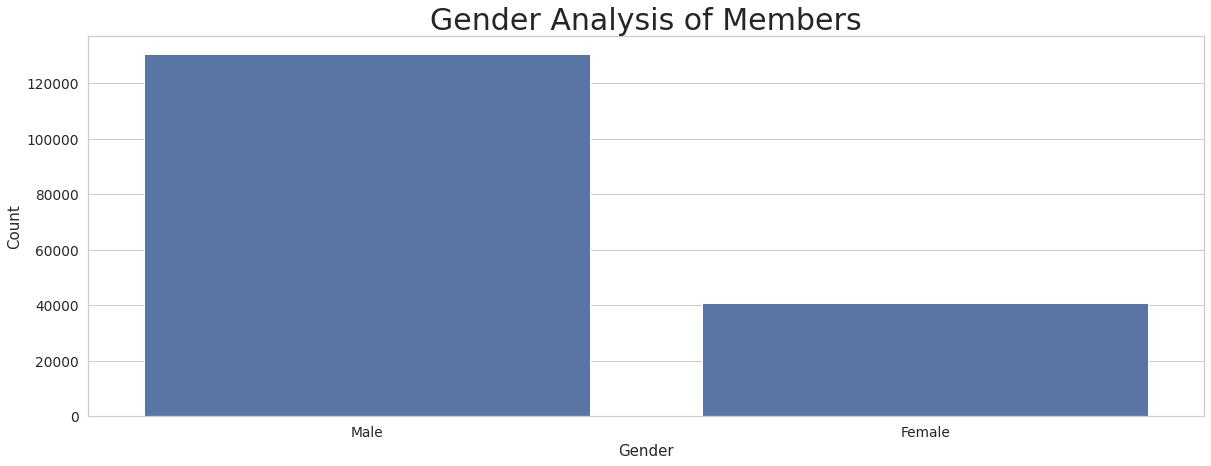

In [3]:
sb.countplot(data=df, x='member_gender', color=base_color);
plt.title('Gender Analysis of Members', fontsize = 30)
plt.xlabel('Gender');
plt.ylabel('Count');

## Analysis of Members by Category

> In this visualization, we can observe how members are divided into two customers and subscribers

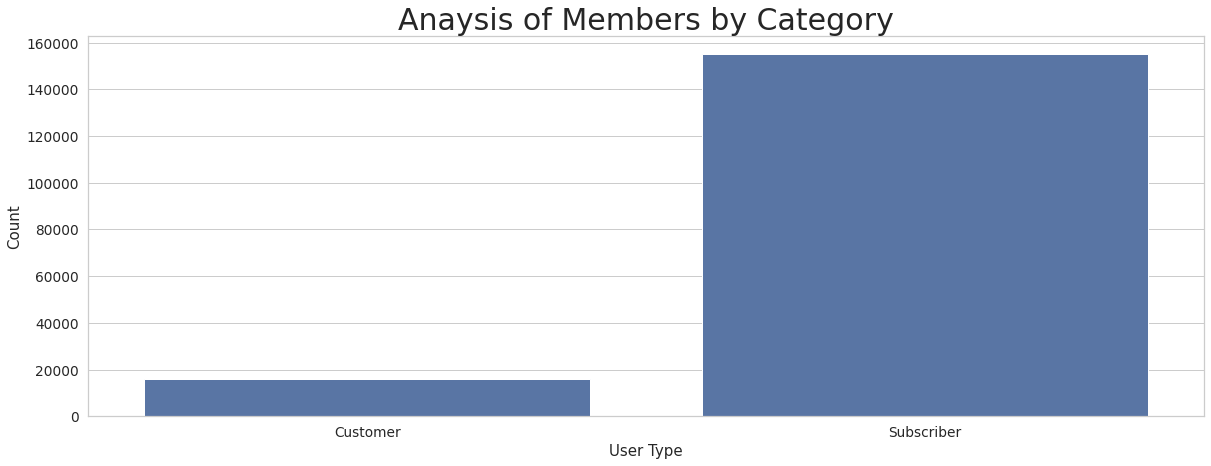

In [4]:
sb.countplot(data=df, x='user_type', color=base_color)
plt.title('Anaysis of Members by Category', fontsize = 30)
plt.xlabel('User Type');
plt.ylabel('Count');

## Age distribution of Bike Riders

> In this visualization, the cyclists are distributed based on various age ranges.

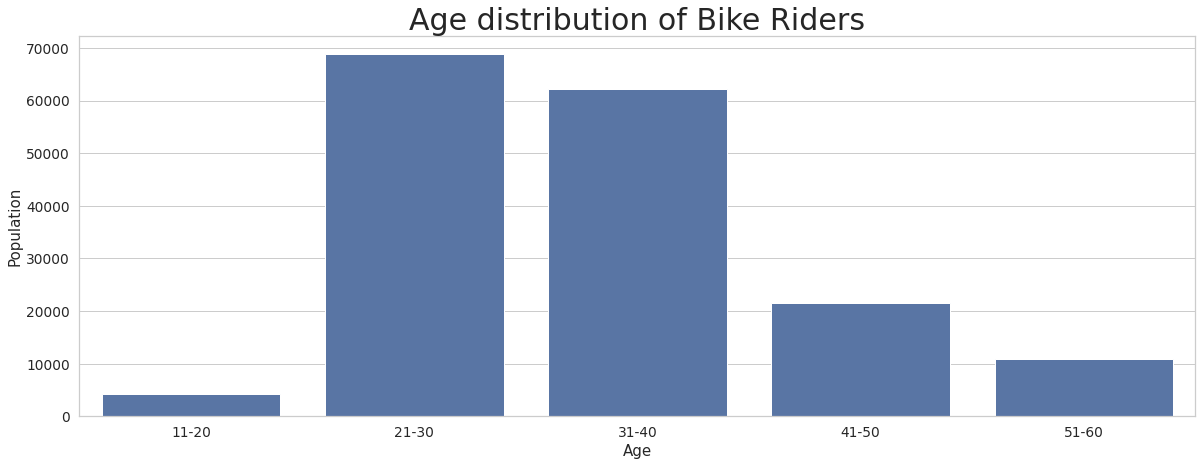

In [5]:
def age_range(age):
    if 10<age<=20:
        return '11-20'
    
    elif 20<age<=30:
        return '21-30'  
    
    elif 30<age<=40:
        return '31-40'
    
    elif 40<age<=50:
        return '41-50'
    
    elif 50<age<=60:
        return '51-60'

df['age_range'] = df['age'].apply(age_range)
age_order = ['11-20', '21-30', '31-40', '41-50', '51-60']
sb.countplot(data=df, x='age_range', color=base_color, order=age_order)

ax = plt.gca()
ax.set_ylabel('Population')
ax.set_xlabel('Age')
ax.set_title("Age distribution of Bike Riders", fontsize=30);

## Weekday analysis by category

> This visualization shows how consumers and subscribers are divided into the several weekdays, demonstrating their daily performance.

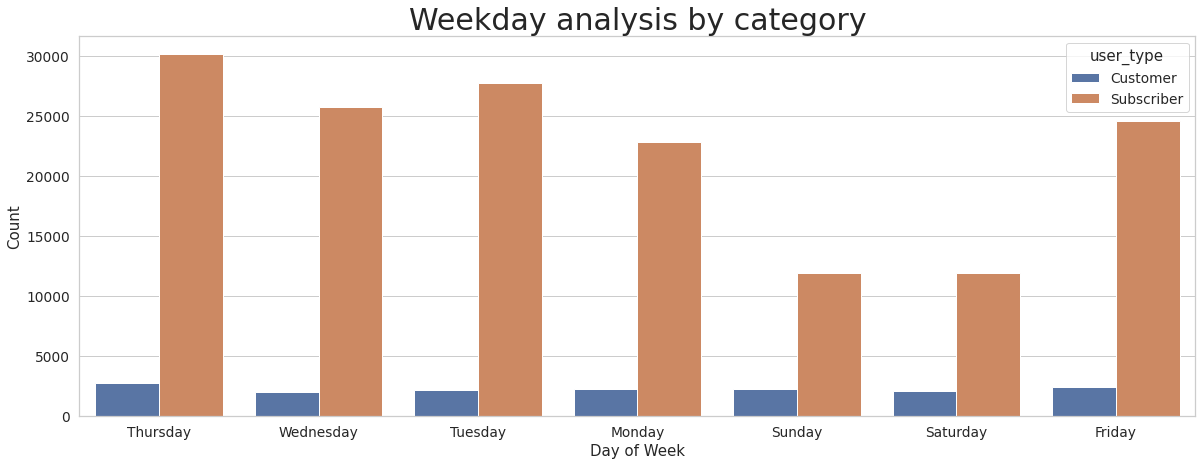

In [6]:
sb.countplot(data=df, x='start_day_of_week', hue='user_type');
plt.title('Weekday analysis by category', fontsize = 30)
plt.xlabel('Day of Week');
plt.ylabel('Count');

## Customers' and Subscribers' Hourly Bike Usage

> This visual representation highlights the riders' daily and hourly performances.

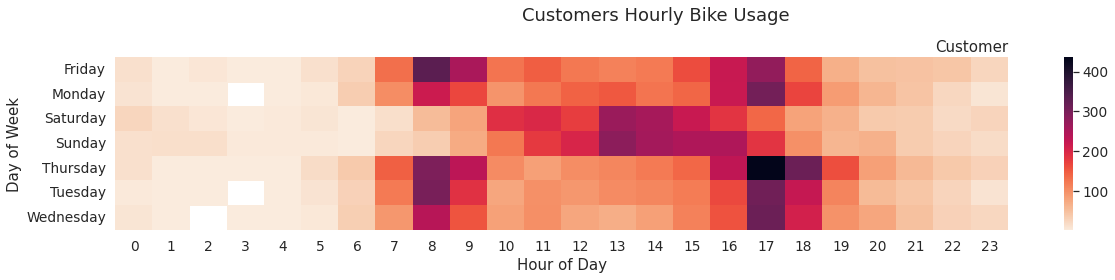

In [7]:
# How does the hourly usage during the weekdays for customers and subscribers?

plt.suptitle("Customers Hourly Bike Usage")

plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
customer_count = customers.groupby(['start_day_of_week', 'start_hour']).size()
customer_count = customer_count.reset_index(name='count')
customer_count = customer_count.pivot(index='start_day_of_week', columns='start_hour', values='count')
sb.heatmap(customer_count, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

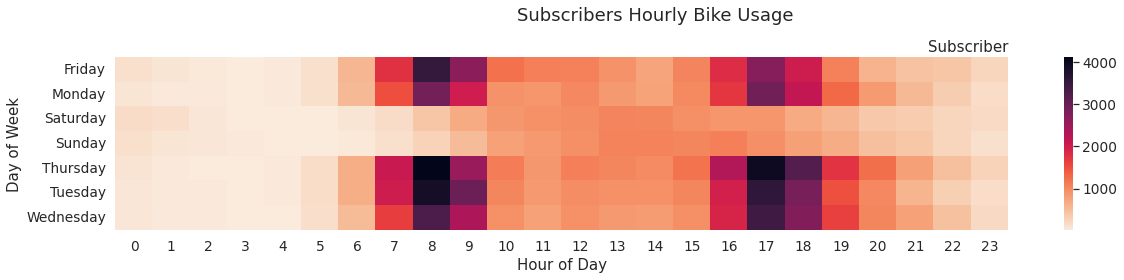

In [8]:
plt.suptitle("Subscribers Hourly Bike Usage")

plt.subplot(2, 1, 1)
subscribers = df.query('user_type == "Subscriber"')
subscriber_count = subscribers.groupby(['start_day_of_week', 'start_hour']).size()
subscriber_count = subscriber_count.reset_index(name='count')
subscriber_count = subscriber_count.pivot(index='start_day_of_week', columns='start_hour', values='count')
sb.heatmap(subscriber_count, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

## Summary

>Finally, this analysis provides a wide summary of the information as well as answers to questions concerning bike trips in San Francisco. Our analysis suggests that:
> * The dataset is made up of two key components: subscribers and consumers. 
> * It also explains and illustrates the usage of each of these groups of users, indicating that there are considerably more subscribers than consumers.
> * Bikes are widely utilized during the week, particularly on Thursdays between 7 - 9 a.m. and 16-19 p.m., and on weekends between 10-18 p.m. 
> * More than 70% of bike riders are between the ages of 21 and 40. 

## Conclusion

> We may conclude that the majority of subscribers are from San Francisco's working class based on the surge in bike use between the early and late hours compared to consumers and the fact that the majority of riders are between the ages of 21 and 40.